<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns              #use for create heatmat and scattor
from scipy import stats
import matplotlib.pyplot as plt    #visualization
import pylab                       #visualization
import math

#statsmodels is used for evluation
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor   #use for eliminating mulitcollienrity

#we use sk-learn to built our model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing   #use for 
from sklearn.linear_model import Lasso   #use for feature selection
from sklearn.decomposition import PCA   



#use for insert images
from IPython.display import Image

%matplotlib inline

# 1.Clean Data

## 1.1 Insert Raw data and preprocess

In [2]:
#input raw dataset
df_1=pd.read_csv("02_data/23_API_USA_GPD First.csv")

#Raw data have variable on its row and year on its columns. For easier understanding, we convert the rows and colunms
df_2=df_1.T

#Well, cause we already know we are using USA data, so these to rows are useless. We drop them
df_3=df_2.drop(["Country Name", "Country Code","Indicator Code"],axis=0)

#this step, we drop all the rows(axis=0) are all NaN. Maybe world bank didn't record from 1960-1969, so these years data is empty
df_4=df_3.drop(["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","2018","2019"])

#thit setp, we drop any columns that have Nan values, we only need consistency valuse
df_5=df_4.dropna(axis=1,how='any') 

#check if we have still have null value in df_5
df_5.isnull().any()

0       False
8       False
9       False
12      False
13      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
32      False
33      False
34      False
39      False
40      False
41      False
42      False
45      False
46      False
81      False
        ...  
1296    False
1297    False
1298    False
1299    False
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1378    False
1379    False
1380    False
1381    False
1385    False
1386    False
1388    False
1389    False
1390    False
1391    False
1392    False
1394    False
1395    False
1396    False
1397    False
1399    False
1400    False
1401    False
1404    False
Length: 348, dtype: bool

In [3]:
#every a few steps, we should save our new cleaned data into a new file, so next time we can read these cleaned dataset directly
export_csv = df_5.to_csv (r'02_data/26_API_US_df_5_cleaned.csv',header=False) 

In [4]:
df_6=pd.read_csv("02_data/26_API_US_df_5_cleaned.csv")

In [5]:
df_6.head()

,Indicator Name,GDP growth (annual %),Travel services (% of commercial service exports),Transport services (% of commercial service exports),Commercial service exports (current US$),"Computer, communications and other services (% of commercial service exports)",Merchandise exports by the reporting economy (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports),...,General government final consumption expenditure (% of GDP),General government final consumption expenditure (constant LCU),General government final consumption expenditure (constant 2010 US$),General government final consumption expenditure (current LCU),General government final consumption expenditure (current US$),Arms exports (SIPRI trend indicator values),Military expenditure (% of GDP),Military expenditure (current LCU),Military expenditure (current USD),Arms imports (SIPRI trend indicator values)
0,1970,-0.254080,24.220374,38.149688,9.620000e+09,36.798337,4.321880e+10,4.153054,2.667820,2.131017,...,17.961843,1.260000e+12,1.260000e+12,1.930000e+11,1.930000e+11,9.017000e+09,7.689700,7.984600e+10,7.984600e+10,46000000.0
1,1971,3.293362,24.049430,36.977186,1.052000e+10,38.022814,4.414260e+10,3.864747,2.947266,2.009397,...,17.938790,1.260000e+12,1.260000e+12,2.090000e+11,2.090000e+11,1.172000e+10,6.643475,7.486200e+10,7.486200e+10,539000000.0
2,1972,5.258895,24.247635,36.715391,1.163000e+10,37.661221,4.981250e+10,4.293099,2.344793,1.459473,...,17.629289,1.260000e+12,1.260000e+12,2.250000e+11,2.250000e+11,1.078700e+10,6.271831,7.763900e+10,7.763900e+10,681000000.0
3,1973,5.645719,24.289773,38.707386,1.408000e+10,35.866477,7.142870e+10,5.795710,2.227396,1.304798,...,16.776275,1.250000e+12,1.250000e+12,2.390000e+11,2.390000e+11,1.203300e+10,5.668750,7.835800e+10,7.835800e+10,666000000.0
4,1974,-0.540547,23.806718,39.893930,1.697000e+10,35.356511,9.859770e+10,4.283568,2.450361,1.450338,...,17.162673,1.280000e+12,1.280000e+12,2.650000e+11,2.650000e+11,1.275200e+10,5.729167,8.590600e+10,8.590600e+10,594000000.0


In [6]:
df_6.columns

Index(['Indicator Name', 'GDP growth (annual %)',
       'Travel services (% of commercial service exports)',
       'Transport services (% of commercial service exports)',
       'Commercial service exports (current US$)',
       'Computer, communications and other services (% of commercial service exports)',
       'Merchandise exports by the reporting economy (current US$)',
       'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)',
       ...
       'General government final consumption expenditure (% of GDP)',
       'General government final consumption expenditure (constant LCU)',
       'General government final consumption expenditure (constant 2010 US$)',
       'General government final consumption expendit

## 1.2 Delect irrelate features

In [7]:
#i want to on extract the growth data, because these columns already difference number, don't have to cacluate difference value
#i am sorry for this part. I was trying to use VIF to eliminate multicollinearity columns, BUT VIF give me all INF results. So i have to elimiate them mannually
df_7=df_6
df_del=[]
for col in df_7.columns:
    if "growth" in col:
        df_del.append(col)
        df_7=df_7.drop(col,axis=1)      

In [8]:
#check if we success, df_6 is original dataset
df_6.shape

(48, 349)

In [9]:
#df_7 is the processed dataset
df_7.shape

(48, 341)

In [10]:
df_7.head()
#beacause i want to analysis ecnomic time problem. it should use change number to analysis.
df_7=df_7.diff()

#Therotically we should use percent_change to cacluate, but it cann't pass VIF
#df_7=df_7.pct_change()

df_7.head()

#After pd.diff(), the first raw become np.nan. Therefore, we should delete 1970 row
df_7=df_7.drop(0,axis=0)

#because, in previous process, we use diff() to caculate, so we miss the 1970 data. So we have to drop this year to fit df_7
df_6=df_6.drop(0,axis=0)

df_7.head()

#we have to add all "growth" columns back
for col in df_6.columns:
    if "growth" in col:
        print(col)
        df_7.insert(0,col,df_6[col])

GDP growth (annual %)
Urban population growth (annual %)
Rural population growth (annual %)
Population growth (annual %)
Broad money growth (annual %)
Claims on private sector (annual growth as % of broad money)
Claims on central government (annual growth as % of broad money)
GDP per capita growth (annual %)


In [11]:
df_7.shape

df_7.head()

#I try to some ways to change columns order but failed. So i use this primitive way to put GDP into first colunms
df_7=df_7.drop(["GDP growth (annual %)"],axis=1)

#insert GDP to first columns to easy understand relationship between GDP and other features.
df_7.insert(0,"GDP growth (annual %)",df_6["GDP growth (annual %)"])


#I set the year to be my index. The reason behind this is because it will make selecting data more easier.

df_7.head()

df_7.index=df_6['Indicator Name']

df_7.index.names=["Year"]

df_7=df_7.drop('Indicator Name',axis =1)

#double check again and replace NULL value with nan
df_7.replace([np.inf, -np.inf], np.nan)
df_7=df_7.replace("inf","nan")
df_7=df_7.replace("..","nan")
df_7.isnull().any()

GDP growth (annual %)                                                                                                        False
GDP per capita growth (annual %)                                                                                             False
Claims on central government (annual growth as % of broad money)                                                             False
Claims on private sector (annual growth as % of broad money)                                                                 False
Broad money growth (annual %)                                                                                                False
Population growth (annual %)                                                                                                 False
Rural population growth (annual %)                                                                                           False
Urban population growth (annual %)                                                 

In [12]:
export_csv = df_7.to_csv (r'02_data/27_API_US_df_7_cleaned.csv',header=False) 

In [13]:
#this step is for np.inf check.
df_7.columns.to_series()[np.isinf(df_7).any()]

#If we find np.inf, we just drop this columns.
#df_7.columns.to_series()[np.isinf(df_7).any()] can return column names with inf data
df_8=df_7.drop(df_7.columns.to_series()[np.isinf(df_7).any()],axis=1)

df_7.shape

df_8.shape

#this line can check Null value for all data points
df_8.isnull().values.any()

#df_7.columns.to_series()[np.isin(df_7,0).any()]

#To make sure identical format, we tranfor all data to float
df_8.dtypes
df_8=df_8.astype(float)

In [14]:
export_csv = df_8.to_csv (r'02_data/28_API_US_df_8_cleaned.csv') 

In [15]:
df_8.head()

,GDP growth (annual %),GDP per capita growth (annual %),Claims on central government (annual growth as % of broad money),Claims on private sector (annual growth as % of broad money),Broad money growth (annual %),Population growth (annual %),Rural population growth (annual %),Urban population growth (annual %),Travel services (% of commercial service exports),Transport services (% of commercial service exports),...,General government final consumption expenditure (% of GDP),General government final consumption expenditure (constant LCU),General government final consumption expenditure (constant 2010 US$),General government final consumption expenditure (current LCU),General government final consumption expenditure (current US$),Arms exports (SIPRI trend indicator values),Military expenditure (% of GDP),Military expenditure (current LCU),Military expenditure (current USD),Arms imports (SIPRI trend indicator values)
Year,,,,,,,,,,,,,,,,,,,,,
1971,3.293362,1.995611,1.068298,8.306480,13.955251,1.264334,1.222655,1.279278,-0.170945,-1.172502,...,-0.023053,0.000000e+00,0.000000e+00,1.600000e+10,1.600000e+10,2.703000e+09,-1.046225,-4.984000e+09,-4.984000e+09,493000000.0
1972,5.258895,4.138085,0.275778,12.281009,13.590393,1.070523,1.032618,1.084106,0.198206,-0.261795,...,-0.309501,0.000000e+00,0.000000e+00,1.600000e+10,1.600000e+10,-9.330000e+08,-0.371644,2.777000e+09,2.777000e+09,142000000.0
1973,5.645719,4.642153,-0.149016,12.745452,10.175979,0.954477,0.916558,0.968059,0.042137,1.991995,...,-0.853014,-1.000000e+10,-1.000000e+10,1.400000e+10,1.400000e+10,1.246000e+09,-0.603081,7.190000e+08,7.190000e+08,-15000000.0
1974,-0.540547,-1.445129,0.109780,8.111143,7.850727,0.913660,0.875727,0.927240,-0.483055,1.186544,...,0.386398,3.000000e+10,3.000000e+10,2.600000e+10,2.600000e+10,7.190000e+08,0.060417,7.548000e+09,7.548000e+09,-72000000.0
1975,-0.205464,-1.184589,3.660049,2.375971,10.178432,0.985986,0.948037,0.999565,1.153452,-3.303383,...,0.448123,3.000000e+10,3.000000e+10,3.200000e+10,3.200000e+10,2.954000e+09,-0.331254,2.494000e+09,2.494000e+09,-249000000.0


In [16]:
df_8=pd.read_csv("02_data/28_API_US_df_8_cleaned.csv")

For now we have complete the data clean step and restore the cleaned data into new file. So, we can get our cleaned data from new file directly

<br>

<br>

<br>

# 2 Preprocess data and check for Multicollinearity

From here, we already have cleaned data "28_API_US_df_8_cleaned.csv". Before we start analysis data, we should check our dataset available for LinearRegression analysis

Because we have 47 rows and 349 features,  the X’X matrix cannot be singula. Therefore we cannot use VIF directly before we reshape our matrix to N * P (P<N).So first we use PCA to give a review of our variables and find if there is a few main factor existed.

In [17]:
econ_df=df_8

In [18]:
econ_df.shape

(47, 349)

In [19]:
#IF we find index not "Year", we should assign indext and delete the origial year, because we will use other data to analysis
econ_df.index=df_8['Year']
econ_df.index.names=["Year"]
econ_df=econ_df.drop('Year',axis =1)


In [20]:
econ_df.head()

econ_df.describe()

,GDP growth (annual %),GDP per capita growth (annual %),Claims on central government (annual growth as % of broad money),Claims on private sector (annual growth as % of broad money),Broad money growth (annual %),Population growth (annual %),Rural population growth (annual %),Urban population growth (annual %),Travel services (% of commercial service exports),Transport services (% of commercial service exports),...,General government final consumption expenditure (% of GDP),General government final consumption expenditure (constant LCU),General government final consumption expenditure (constant 2010 US$),General government final consumption expenditure (current LCU),General government final consumption expenditure (current US$),Arms exports (SIPRI trend indicator values),Military expenditure (% of GDP),Military expenditure (current LCU),Military expenditure (current USD),Arms imports (SIPRI trend indicator values)
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,4.700000e+01,4.700000e+01
mean,2.809540,1.805629,0.959344,5.152385,7.165524,0.980881,0.159298,1.212273,0.059803,-0.569155,...,-0.083934,2.446809e+10,2.446809e+10,5.397872e+10,5.397872e+10,7.378723e+07,-0.097461,1.119477e+10,1.119477e+10,1.017021e+07
std,1.995409,1.954912,1.706578,3.703716,3.784028,0.176175,0.512393,0.285594,1.750625,1.254328,...,0.416688,3.235728e+10,3.235728e+10,3.425067e+10,3.425067e+10,1.736361e+09,0.352799,2.270398e+10,2.270398e+10,3.616560e+08
min,-2.536757,-3.387436,-3.702120,-3.211948,-2.752340,0.640459,-0.554086,0.879600,-3.461276,-3.605871,...,-0.853014,-8.000000e+10,-8.000000e+10,0.000000e+00,0.000000e+00,-4.358000e+09,-1.046225,-4.500000e+10,-4.500000e+10,-1.428000e+09
25%,1.859126,0.873497,0.104316,2.864362,4.651534,0.889979,-0.273897,1.020669,-0.600256,-1.195672,...,-0.381545,1.000000e+10,1.000000e+10,3.000000e+10,3.000000e+10,-6.365000e+08,-0.330778,3.595000e+08,3.595000e+08,-9.700000e+07
50%,2.880910,1.995611,0.611440,5.029832,7.932796,0.951055,0.085657,1.119457,0.047955,-0.324034,...,-0.113583,3.000000e+10,3.000000e+10,4.800000e+10,4.800000e+10,6.400000e+07,-0.109224,7.548000e+09,7.548000e+09,-3.000000e+06
75%,4.148570,3.086231,1.504598,7.405839,9.912260,1.108173,0.362751,1.246329,0.690567,0.114855,...,0.201084,4.000000e+10,4.000000e+10,7.500000e+10,7.500000e+10,1.083000e+09,0.067955,2.500000e+10,2.500000e+10,1.240000e+08
max,7.236620,6.312155,8.081372,12.745452,13.955251,1.386886,1.222655,1.908633,6.493804,1.991995,...,0.833314,1.000000e+11,1.000000e+11,1.500000e+11,1.500000e+11,3.653000e+09,1.133483,6.400000e+10,6.400000e+10,1.572000e+09


### 2.1 PCA check multicollinearity

PCA is good for predict but not easy to explain because new PCA variables may be fix with hundreds of different origial variables.

Our main task is to explain this GDP model not to predict futrue GDP, we only use PCA to explore our dataset and give a few insight of our variables.

In [21]:
#don't need to split, not for predict, just for test
X = econ_df.drop('GDP growth (annual %)',axis=1)
Y = econ_df[['GDP growth (annual %)']]


In [22]:
PCA_model=PCA()
component_ = PCA_model.fit(X)

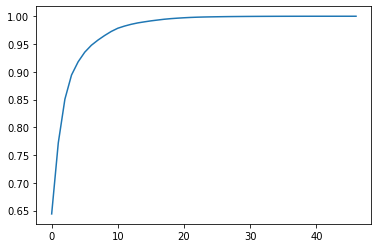

In [23]:
#We can see from plot that less than 5 PCA components variables can reach 80% accuracy and can explain our X Y relationship
plt.plot(PCA_model.explained_variance_ratio_.cumsum())

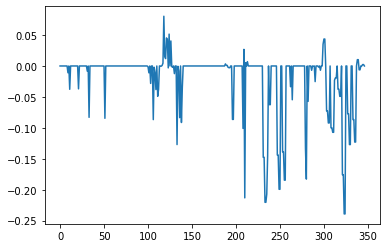

In [24]:
plt.plot(PCA_model.components_[0,:])

### 2.2 Lasso Regression for Variables sellection

Compared to PCA, Lasso is good at explain relationship between indivual denpendent and indiependant. And we can controal the fillter number result and get good results

In [25]:

X = econ_df.drop('GDP growth (annual %)',axis=1)
Y = econ_df[['GDP growth (annual %)']]


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [27]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
from sklearn.linear_model import LassoCV
coef_ = []
alphas = 10**np.linspace(-5,5,1000)
models = []
for alpha in alphas:
    ls_md = Lasso(alpha,normalize=True)
    ls_md.fit(X_train, y_train)
    coef_.append(ls_md.coef_)
    models.append(coef_)


In [29]:
coef_ = pd.DataFrame(coef_, columns = X.columns, index = np.log10(alphas))

coefNotZero = coef_!=0

In [30]:
coefNotZero.loc[-4.000000:-3.0000]

,GDP per capita growth (annual %),Claims on central government (annual growth as % of broad money),Claims on private sector (annual growth as % of broad money),Broad money growth (annual %),Population growth (annual %),Rural population growth (annual %),Urban population growth (annual %),Travel services (% of commercial service exports),Transport services (% of commercial service exports),Commercial service exports (current US$),...,General government final consumption expenditure (% of GDP),General government final consumption expenditure (constant LCU),General government final consumption expenditure (constant 2010 US$),General government final consumption expenditure (current LCU),General government final consumption expenditure (current US$),Arms exports (SIPRI trend indicator values),Military expenditure (% of GDP),Military expenditure (current LCU),Military expenditure (current USD),Arms imports (SIPRI trend indicator values)
-3.998999,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.988989,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.978979,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.968969,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.958959,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.948949,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.938939,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.928929,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.918919,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
-3.908909,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


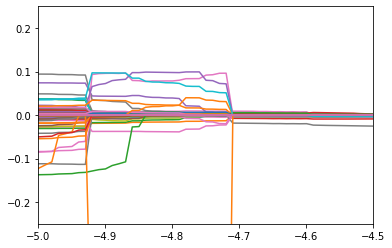

In [31]:
#we only care about 
coef_.plot(legend=False,xlim=(-5,-4.5), ylim=(-0.25,0.25))

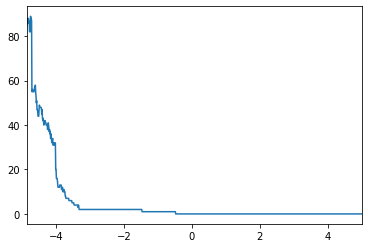

In [32]:
coefNotZero.sum(axis=1)
coefNotZero = coefNotZero[coefNotZero.sum(axis=1)<105]
coefNotZero.sum(axis=1).plot()

In [33]:
ls_ = coefNotZero.iloc[0,:]
ls_[ls_==True]

GDP per capita growth (annual %)                                                                                               True
Claims on central government (annual growth as % of broad money)                                                               True
Broad money growth (annual %)                                                                                                  True
Population growth (annual %)                                                                                                   True
Rural population growth (annual %)                                                                                             True
Urban population growth (annual %)                                                                                             True
Transport services (% of commercial service exports)                                                                           True
Computer, communications and other services (% of commercial service exports

In [34]:
d = coef_.iloc[100]
name_after=d[d!=0]
name_after.index

Index(['GDP per capita growth (annual %)', 'Population growth (annual %)',
       'Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)',
       'Merchandise exports to economies in the Arab World (% of total merchandise exports)',
       'Population, female',
       'Population ages 65-69, male (% of male population)',
       'Population ages 65-69, female (% of female population)',
       'Population ages 50-54, female (% of female population)',
       'Secondary income receipts (BoP, current US$)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Population ages 15-64, total', 'Population ages 15-64, male',
       'Real interest rate (%)',
       'Ratio of female to male labor force participation rate (%) (national estimate)',
       'Population density (people per sq. km of land area)',
       'Employment to population ratio, 15+, female (%) (national estimate)',
       'Gross capital formation (% of GDP)'

In [35]:
df_11=df_8[name_after.index]

In [36]:
df_11.insert(0,"GDP growth (annual %)",df_8["GDP growth (annual %)"])

In [37]:
df_11

,GDP growth (annual %),GDP per capita growth (annual %),Population growth (annual %),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),"Population, female","Population ages 65-69, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 50-54, female (% of female population)","Secondary income receipts (BoP, current US$)",...,"Population ages 15-64, total","Population ages 15-64, male",Real interest rate (%),Ratio of female to male labor force participation rate (%) (national estimate),Population density (people per sq. km of land area),"Employment to population ratio, 15+, female (%) (national estimate)",Gross capital formation (% of GDP),Final consumption expenditure (% of GDP),General government final consumption expenditure (% of GDP),Arms exports (SIPRI trend indicator values)
Year,,,,,,,,,,,,,,,,,,,,,
1971,3.293362,1.995611,1.264334,0.279446,0.241008,1368116.0,0.002698,0.010341,0.026390,2.000000e+07,...,2599660.0,1341586.0,-1.657706,0.538526,0.284858,-0.399998,0.505082,-0.190472,-0.023053,2.703000e+09
1972,5.258895,4.138085,1.070523,-0.602473,0.227321,1160792.0,-0.002296,0.023770,0.039128,2.100000e+08,...,2382135.0,1248981.0,0.264602,0.772792,0.244023,0.599998,0.660804,-0.343958,-0.309501,-9.330000e+08
1973,5.645719,4.642153,0.954477,-0.117397,0.124090,1040154.0,0.007381,0.049801,0.036367,9.000000e+07,...,2269609.0,1208047.0,1.522515,1.085836,0.219785,1.000000,0.751186,-1.303152,-0.853014,1.246000e+09
1974,-0.540547,-1.445129,0.913660,0.222965,0.950375,1011922.0,0.024306,0.067888,0.015416,2.000000e+07,...,2275952.0,1217397.0,-0.758663,1.342731,0.212360,0.599998,-0.636867,0.977954,0.386398,7.190000e+08
1975,-0.205464,-1.184589,0.985986,0.369825,1.577790,1116280.0,0.036623,0.063386,-0.014099,0.000000e+00,...,2438289.0,1292463.0,-2.932497,1.366553,0.231358,-0.599998,-2.417466,1.416539,0.448123,2.954000e+09
1976,5.388139,4.391463,0.950220,-0.058708,1.158497,1107893.0,0.012272,-0.009885,-0.036438,4.000000e+07,...,1975744.0,863861.0,2.548319,1.597086,0.225135,1.200001,1.760923,-0.725678,-0.822817,-4.400000e+07
1977,4.624159,3.577153,1.005772,-0.169759,0.571439,1195707.0,0.031203,-0.018071,-0.057282,-6.000000e+07,...,2164298.0,957654.0,-0.691817,1.258610,0.240639,1.299999,1.487871,-0.465617,-0.400009,-1.273000e+09
1978,5.535303,4.422982,1.059573,-0.258080,-0.251053,1272244.0,0.062446,-0.006186,-0.077568,1.100000e+08,...,2276098.0,1024714.0,1.314826,1.893984,0.256143,1.900002,1.305515,-1.336117,-0.621250,-3.060000e+08
1979,3.166150,2.033892,1.103577,-0.455629,-0.558002,1323346.0,0.082090,0.015635,-0.094852,3.300000e+08,...,2279440.0,1052925.0,2.144612,1.239313,0.269681,1.099998,0.279336,-0.499992,-0.363081,-4.358000e+09


<br>

<br>

<br>

<br>

<br>

Because i have more than 50 columns as variable. We cannot find multicollinearity between two variables randomly by human search. We have to use correaltion to check multicollineary. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.

If  we don't check multicollinearity before we manipulate dataset, the coefficient estimates themselves tend to be unreliable,because the standard error is used to help calculate the p-value, this leads to a higher probability that we will incorrectly conclude that a variable is not statistically significant.

In [38]:
corr=df_11.corr()
corr

,GDP growth (annual %),GDP per capita growth (annual %),Population growth (annual %),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),"Population, female","Population ages 65-69, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 50-54, female (% of female population)","Secondary income receipts (BoP, current US$)",...,"Population ages 15-64, total","Population ages 15-64, male",Real interest rate (%),Ratio of female to male labor force participation rate (%) (national estimate),Population density (people per sq. km of land area),"Employment to population ratio, 15+, female (%) (national estimate)",Gross capital formation (% of GDP),Final consumption expenditure (% of GDP),General government final consumption expenditure (% of GDP),Arms exports (SIPRI trend indicator values)
GDP growth (annual %),1.000000,0.995908,0.163144,-0.437149,-0.497786,0.008515,-0.271326,-0.324636,0.090538,-0.226189,...,0.110665,0.095203,0.374804,0.132035,-0.048715,0.717692,0.826242,-0.703701,-0.755316,-0.229318
GDP per capita growth (annual %),0.995908,1.000000,0.073322,-0.446020,-0.507656,-0.065854,-0.201146,-0.252569,0.036191,-0.206140,...,0.050947,0.034610,0.379188,0.114791,-0.114060,0.719717,0.834242,-0.714555,-0.766805,-0.224734
Population growth (annual %),0.163144,0.073322,1.000000,0.045758,0.047725,0.811639,-0.798740,-0.825164,0.600772,-0.241364,...,0.662061,0.669859,-0.003947,0.203778,0.706101,0.063328,0.010422,0.035100,0.036840,-0.075977
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),-0.437149,-0.446020,0.045758,1.000000,0.425756,0.113679,0.037790,0.043540,0.184057,0.092166,...,0.204929,0.200454,-0.119931,-0.114701,0.140553,-0.413434,-0.253254,0.173061,0.302941,0.416959
Merchandise exports to economies in the Arab World (% of total merchandise exports),-0.497786,-0.507656,0.047725,0.425756,1.000000,-0.016161,0.020164,0.047992,0.010663,-0.013885,...,0.290265,0.263824,-0.048218,0.070814,-0.029556,-0.345622,-0.306946,0.245570,0.261409,0.389643
"Population, female",0.008515,-0.065854,0.811639,0.113679,-0.016161,1.000000,-0.548211,-0.606444,0.785767,-0.075429,...,0.490732,0.478429,-0.054620,-0.236438,0.972489,-0.201078,-0.062392,0.077021,0.118256,-0.111905
"Population ages 65-69, male (% of male population)",-0.271326,-0.201146,-0.798740,0.037790,0.020164,-0.548211,1.000000,0.938564,-0.541623,0.213371,...,-0.576558,-0.611907,0.002240,-0.318360,-0.469710,-0.214316,-0.013285,-0.132239,-0.097342,0.046338
"Population ages 65-69, female (% of female population)",-0.324636,-0.252569,-0.825164,0.043540,0.047992,-0.606444,0.938564,1.000000,-0.540908,0.191879,...,-0.607678,-0.596544,-0.072522,-0.306611,-0.507013,-0.279658,-0.104883,-0.059176,-0.013250,0.130249
"Population ages 50-54, female (% of female population)",0.090538,0.036191,0.600772,0.184057,0.010663,0.785767,-0.541623,-0.540908,1.000000,0.014515,...,0.616133,0.626788,-0.130309,-0.297006,0.798711,-0.233365,-0.018374,0.069395,0.105407,-0.165805
"Secondary income receipts (BoP, current US$)",-0.226189,-0.206140,-0.241364,0.092166,-0.013885,-0.075429,0.213371,0.191879,0.014515,1.000000,...,-0.154606,-0.166091,-0.140618,-0.194469,-0.010197,-0.196383,-0.094314,0.077427,0.169823,-0.107316


Looking at the heatmap along with the correlation matrix we can identify a few highly correlated variables. For example, if you look at the correlation between gdp_growth and final_consum_growth it ends up at almost 0.83. It's very easy to undersand because consumption is part of GDP. Therefore we cannot use final_consum_growth as GDP affectors. This is an extremely high correlation and marks it as a candidate to be removed. Logically it makes sense that these two are highly correlated.

In this correlation() and heatmap, we find three candidate multicollinearity variables


- GDP per capita growth (annual %)
- Gross national expenditure (constant LCU)	
- Gross national expenditure (constant 2010 US$)

- Households and NPISHs Final consumption expenditure per capita (constant 2010 US$)
- General government final consumption expenditure (% of GDP)


Because of these drawbacks, we should always check for multicollinearity in our data. Now, in the step above I purposely pull in variables that I knew would be highly correlated with each other; that way we could see some examples of variables that would cause some issues.

The first thing we can do is create a correlation matrix using the corr() function; this will create a matrix with each variable having its correlation calculated for all the other variables. Keep in mind, if you travel diagonally down the matrix all the associations should be one, as it is calculating the correlation of the variable with itself. When we have multiple variables as we do, I sometimes prefer to use a correlation heatmap this way I can quickly identify the highly correlated variables, by just looking for the darker colors.

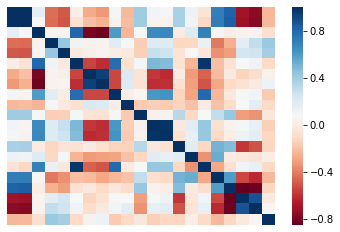

In [39]:
#plot a heatmap to find out the highly correatled variables
sns.heatmap(corr,xticklabels=False, yticklabels=False,cmap='RdBu')

However, we should be more systematic in our approach to removing highly correlated variables. One method we can use is the variance_inflation_factor which is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.


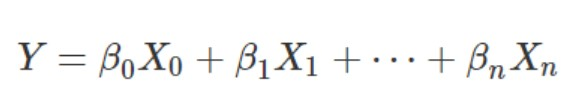

In [16]:
Image("03_Photo/01.jpg")

For a <code>statsmodels.OLS</code> will not assume regression model have constant term. For all t=1,...,k,set <code>t(0)=1</code>.
The second input of 
<code> statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)</code> was an array of <code>k × (n+1)</code>, and the first colunms values is 1.

Reference:https://zhuanlan.zhihu.com/p/22692029

In [40]:
econ_df_before=df_11

df_12=sm.tools.add_constant(econ_df_before)
#X1

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


A general recommendation is that if any of our variables come back with a value of 5 or higher, then they should be removed from the model. I decided to show you how the VIF comes out before we drop the highly correlated variables and after we remove the highly correlated variables. Going forward in the tutorial we will only be using the econ_df_after data frame.

Put variance_inflation_factors in <code>vif.DataFrame</code>, and use this dataframe to eliminate data columns in df_10

In [41]:
vif=pd.DataFrame()
vif["VIF_Factor"]= pd.Series([variance_inflation_factor(df_12.values ,i) for i in range(df_12.shape[1])],index=df_12.columns)
vif["Features"]=df_12.columns

#display series_before
print('DATA BEFORE')
print('-'*100)
display(vif[["VIF_Factor"]])

DATA BEFORE
----------------------------------------------------------------------------------------------------


,VIF_Factor
const,5.192942e+02
GDP growth (annual %),1.347073e+06
GDP per capita growth (annual %),1.316962e+06
Population growth (annual %),1.069582e+04
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),2.034518e+00
Merchandise exports to economies in the Arab World (% of total merchandise exports),3.074238e+00
"Population, female",1.072499e+02
"Population ages 65-69, male (% of male population)",2.661934e+01
"Population ages 65-69, female (% of female population)",2.254846e+01
"Population ages 50-54, female (% of female population)",8.152223e+00


create a drop list <code>drop_col</code>, save the column names of VIF which greater than 100 and drop the columns in df_10 original dataframe.

In [42]:
#because we have a tramandous VIF results, so i have to eliminate features step by step.
#After several tests i find that once elimiate features that VIF greater than 1,000,000,000, the results become nomal
drop_col=[]
for i in range(2,len(vif)):     #constant is column 0, we should not delete const column
    if vif.iloc[i,0]>10:       #for now, we only eliminate 
        drop_col.append(df_12.columns[i])

In [43]:
drop_col

['GDP per capita growth (annual %)',
 'Population growth (annual %)',
 'Population, female',
 'Population ages 65-69, male (% of male population)',
 'Population ages 65-69, female (% of female population)',
 'Population ages 15-64, total',
 'Population ages 15-64, male',
 'Population density (people per sq. km of land area)',
 'Final consumption expenditure (% of GDP)']

In [44]:
#In here, we save the new data into df_11
df_13 = df_12.drop(drop_col,axis=1)      

In [45]:
df_13

,const,GDP growth (annual %),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),"Population ages 50-54, female (% of female population)","Secondary income receipts (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",Real interest rate (%),Ratio of female to male labor force participation rate (%) (national estimate),"Employment to population ratio, 15+, female (%) (national estimate)",Gross capital formation (% of GDP),General government final consumption expenditure (% of GDP),Arms exports (SIPRI trend indicator values)
Year,,,,,,,,,,,,,
1971,1.0,3.293362,0.279446,0.241008,0.026390,2.000000e+07,-0.042707,-1.657706,0.538526,-0.399998,0.505082,-0.023053,2.703000e+09
1972,1.0,5.258895,-0.602473,0.227321,0.039128,2.100000e+08,0.030854,0.264602,0.772792,0.599998,0.660804,-0.309501,-9.330000e+08
1973,1.0,5.645719,-0.117397,0.124090,0.036367,9.000000e+07,0.043191,1.522515,1.085836,1.000000,0.751186,-0.853014,1.246000e+09
1974,1.0,-0.540547,0.222965,0.950375,0.015416,2.000000e+07,0.066767,-0.758663,1.342731,0.599998,-0.636867,0.386398,7.190000e+08
1975,1.0,-0.205464,0.369825,1.577790,-0.014099,0.000000e+00,-0.063563,-2.932497,1.366553,-0.599998,-2.417466,0.448123,2.954000e+09
1976,1.0,5.388139,-0.058708,1.158497,-0.036438,4.000000e+07,0.021543,2.548319,1.597086,1.200001,1.760923,-0.822817,-4.400000e+07
1977,1.0,4.624159,-0.169759,0.571439,-0.057282,-6.000000e+07,-0.034179,-0.691817,1.258610,1.299999,1.487871,-0.400009,-1.273000e+09
1978,1.0,5.535303,-0.258080,-0.251053,-0.077568,1.100000e+08,0.109466,1.314826,1.893984,1.900002,1.305515,-0.621250,-3.060000e+08
1979,1.0,3.166150,-0.455629,-0.558002,-0.094852,3.300000e+08,0.082367,2.144612,1.239313,1.099998,0.279336,-0.363081,-4.358000e+09


In [46]:
df_12=df_13

In [47]:
vif=pd.DataFrame()
vif["VIF_Factor"]= pd.Series([variance_inflation_factor(df_12.values ,i) for i in range(df_12.shape[1])],index=df_12.columns)
vif["Features"]=df_12.columns

#display series_before
print('DATA BEFORE')
print('-'*100)
display(vif[["VIF_Factor"]])

DATA BEFORE
----------------------------------------------------------------------------------------------------


,VIF_Factor
const,15.083246
GDP growth (annual %),7.667395
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),1.751368
Merchandise exports to economies in the Arab World (% of total merchandise exports),1.790242
"Population ages 50-54, female (% of female population)",1.604955
"Secondary income receipts (BoP, current US$)",1.209185
"Foreign direct investment, net inflows (% of GDP)",1.427081
Real interest rate (%),1.732785
Ratio of female to male labor force participation rate (%) (national estimate),2.298844
"Employment to population ratio, 15+, female (%) (national estimate)",4.972210


In [48]:
#because we have a tramandous VIF results, so i have to eliminate features step by step.
#After several tests i find that once elimiate features that VIF greater than 1,000,000,000, the results become nomal
drop_col=[]
for i in range(2,len(vif)):     #constant is column 0, we should not delete const column
    if vif.iloc[i,0]>5:       #for now, we only eliminate 
        drop_col.append(df_12.columns[i])

In [49]:
drop_col

['Gross capital formation (% of GDP)']

In [50]:
df_13 = df_12.drop(drop_col,axis=1)   

In [51]:
df_13.shape

(47, 12)

In [52]:
vif=pd.DataFrame()
vif["VIF_Factor"]= pd.Series([variance_inflation_factor(df_13.values ,i) for i in range(df_13.shape[1])],index=df_13.columns)
vif["Features"]=df_13.columns

#display series_before
print('DATA BEFORE')
print('-'*100)
display(vif[["VIF_Factor"]])

DATA BEFORE
----------------------------------------------------------------------------------------------------


,VIF_Factor
const,10.063934
GDP growth (annual %),5.097756
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),1.665055
Merchandise exports to economies in the Arab World (% of total merchandise exports),1.755480
"Population ages 50-54, female (% of female population)",1.542809
"Secondary income receipts (BoP, current US$)",1.149326
"Foreign direct investment, net inflows (% of GDP)",1.398881
Real interest rate (%),1.696280
Ratio of female to male labor force participation rate (%) (national estimate),2.275382
"Employment to population ratio, 15+, female (%) (national estimate)",4.924758


In [53]:
#because we have a tramandous VIF results, so i have to eliminate features step by step.
#After several tests i find that once elimiate features that VIF greater than 1,000,000,000, the results become nomal
drop_col=[]
for i in range(2,len(vif)):     #constant is column 0, we should not delete const column
    if vif.iloc[i,0]>5:       #for now, we only eliminate 
        drop_col.append(df_13.columns[i])

In [54]:
df_13 = df_13.drop(drop_col,axis=1)  

In [55]:
vif=pd.DataFrame()
vif["VIF_Factor"]= pd.Series([variance_inflation_factor(df_13.values ,i) for i in range(df_13.shape[1])],index=df_13.columns)
vif["Features"]=df_13.columns

#display series_before
print('DATA BEFORE')
print('-'*100)
display(vif[["VIF_Factor"]])

DATA BEFORE
----------------------------------------------------------------------------------------------------


,VIF_Factor
const,10.063934
GDP growth (annual %),5.097756
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),1.665055
Merchandise exports to economies in the Arab World (% of total merchandise exports),1.755480
"Population ages 50-54, female (% of female population)",1.542809
"Secondary income receipts (BoP, current US$)",1.149326
"Foreign direct investment, net inflows (% of GDP)",1.398881
Real interest rate (%),1.696280
Ratio of female to male labor force participation rate (%) (national estimate),2.275382
"Employment to population ratio, 15+, female (%) (national estimate)",4.924758


In [56]:
X2=sm.tools.add_constant(df_13)

In [57]:
series_after=pd.Series([variance_inflation_factor(X2.values ,i) for i in range(X2.shape[1])],index=X2.columns)

This the reason i didn't eliminate all greater than 5 VIF. When you  eliminate some features, others features'VIF will be change

In [58]:
print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                                                                                             10.063934
GDP growth (annual %)                                                                                              5.097756
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)     1.665055
Merchandise exports to economies in the Arab World (% of total merchandise exports)                                1.755480
Population ages 50-54, female (% of female population)                                                             1.542809
Secondary income receipts (BoP, current US$)                                                                       1.149326
Foreign direct investment, net inflows (% of GDP)                                                                  1.398881
Real interest rate (%)                                                                                             1.696280
Ratio of

I also want to demonstrate another way to visualize our data to check for multicollinearity. Inside of pandas, there is a scatter_matrix chart that will create a scatter plot for each variable in our dataset against another variable. This is a great tool for visualizing the correlation of one variable across all the other variables in the dataset. I'll take my econ_df_after and pass it through the scatter_matrix method. What you're looking for is a more random distribution, there shouldn't be any strong trends in the scatter matrix as this would be identifying correlated variables. Now, for our explanatory variable, we want to see trends!

d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


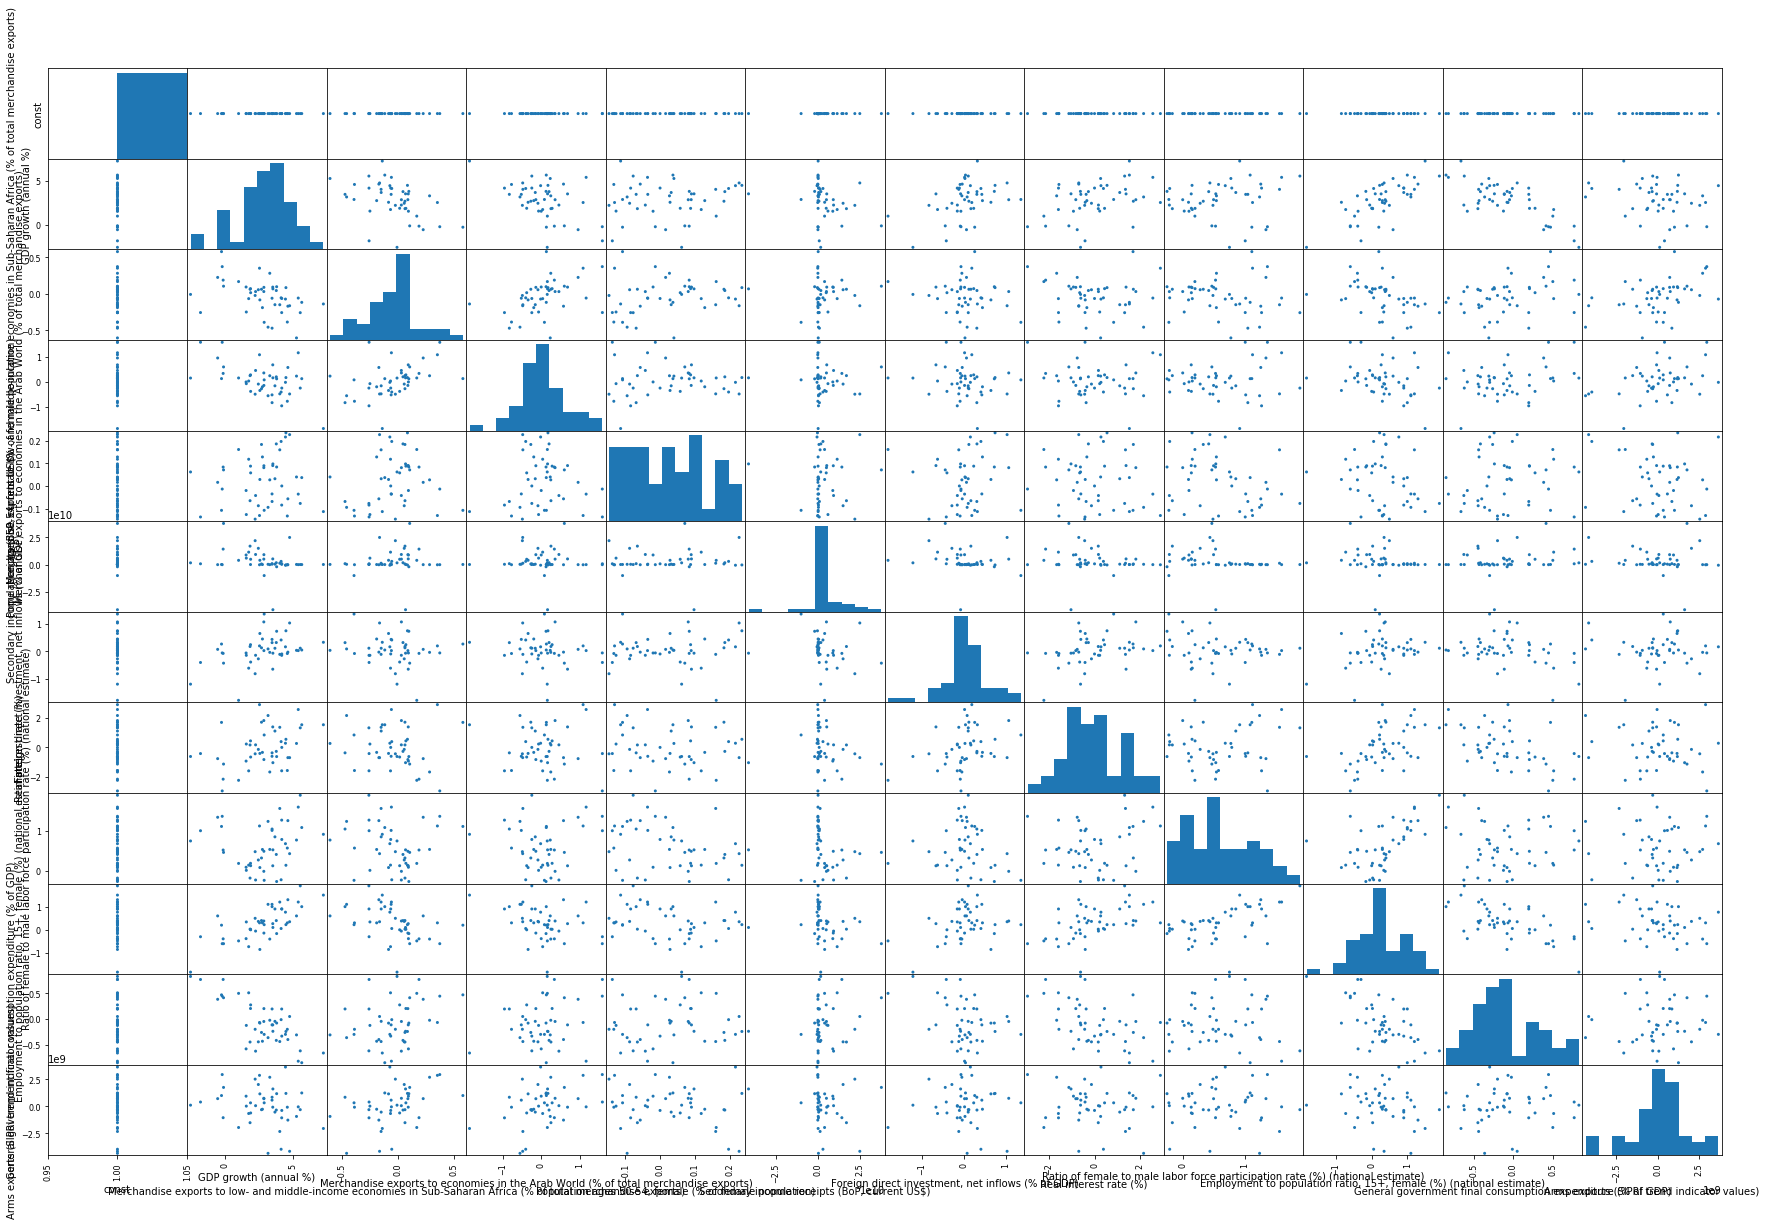

In [59]:
pd.plotting.scatter_matrix(df_13,alpha=1,figsize=(30,20))
plt.show()

<br>







<br>

<br>

# 3. Describe the Data Set

For now, we have got our final cleaned data, we can use data to fit Lineargresssion. But, before that, we should try to explore our data set and describe the distribution and outliers situation in current dataset. 

In [60]:
desc_df=df_13.describe()
desc_df

# add the standard deviation metric
desc_df.loc['+3_std']=desc_df.loc['mean'] + (desc_df.loc['std']*3)
desc_df.loc['-3_std']=desc_df.loc['mean'] - (desc_df.loc['std']*3)
desc_df

,const,GDP growth (annual %),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),"Population ages 50-54, female (% of female population)","Secondary income receipts (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",Real interest rate (%),Ratio of female to male labor force participation rate (%) (national estimate),"Employment to population ratio, 15+, female (%) (national estimate)",General government final consumption expenditure (% of GDP),Arms exports (SIPRI trend indicator values)
count,47.0,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01
mean,1.0,2.809540,-0.037585,0.042663,0.023083,3.374894e+09,0.036227,-0.006844,0.601027,0.293145,-0.083934,7.378723e+07
std,0.0,1.995409,0.225565,0.626872,0.110243,1.050695e+10,0.541452,1.296318,0.546709,0.695596,0.416688,1.736361e+09
min,1.0,-2.536757,-0.602473,-1.867235,-0.146729,-4.130840e+10,-1.794067,-2.932497,-0.264651,-1.828800,-0.853014,-4.358000e+09
25%,1.0,1.859126,-0.156794,-0.312135,-0.073290,6.500000e+07,-0.132905,-0.725240,0.143896,-0.098301,-0.381545,-6.365000e+08
50%,1.0,2.880910,-0.023473,0.076259,0.028059,6.397000e+08,0.030854,-0.270061,0.527701,0.299999,-0.113583,6.400000e+07
75%,1.0,4.148570,0.085383,0.260841,0.089002,5.183500e+09,0.286808,0.967458,1.031124,0.830898,0.201084,1.083000e+09
max,1.0,7.236620,0.574539,1.579985,0.233821,3.781000e+10,1.356828,2.878157,1.893984,1.900002,0.833314,3.653000e+09
+3_std,1.0,8.795766,0.639111,1.923279,0.353813,3.489573e+10,1.660584,3.882109,2.241153,2.379933,1.166130,5.282870e+09
-3_std,1.0,-3.176686,-0.714281,-1.837954,-0.307647,-2.814595e+10,-1.588130,-3.895797,-1.039099,-1.793643,-1.333999,-5.135295e+09


One thing that I want to mention is that we have only 47 observations, but 27 exploratory variables. Many people would argue that we need more observations to have this many exploratory variables and, to be honest, they are correct. Generally we should aim for at least 20 instances for each variable; however, some argue only 10 would do. Regardless, we will see at the end of our model that we only end up with 5 exploratory variables so that we will satisfy that rule.

Looking at the data frame up above, a few values are standing out, for example, the maximum value in the gross_cap_from_growth column is almost three standard deviations above the mean. Such an enormous value would qualify as an outlier. According to  three sigma principle, that is candicate of outlinear variables.
But this is really economnic data, the outlinear data is not input mistake. There are the economic randomness. For example, in 1989 and 2001 we have the Aisan Financial Crisis and the DotCom Bubble. You can not say these data are wrong, they reflect the real marcoeconomic status. So, for out three std, i will not remove this max values. 

Let's ues stats.zscore to test these columns and just assume all data are distribute in 3 standardization. Z-score is the number of standard deviations from the mean a data point is, so if it's less than 3 we keep it otherwise we drop it. From here, I also provided a way to let us know what rows were removed by using the index.difference the function which will show the difference between the two datasets.

In [61]:
#filter the outliers, if some years didn't valuebable, sometimes we can remove it.
#zscore = (X- mean) / std, zscore actually represtent how many standards deviations away from mean for this datapoint. 
#if this data have 3 times more than zscore, which means this is gross error according to three sigma principle
#In this line command, we extract all absolute value of zscore below 3 in a row and get it to new variable econ_remove
#keep abs(zscore)<3, drop abs(zscore)>3, axis=1(for rows)
econ_remove_df=df_13[(np.abs(stats.zscore(df_13))<3).all(axis=1)]
                       
#what rows were removed using difference to show the difference
df_13.index.difference(econ_remove_df.index)

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


Int64Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017],
           dtype='int64', name='Year')

<br>

<br>

<br>

# 4. Build the model

Because economic have random, we cannot predict it precisly. But we can use predict process to verity fromer data cleaning and data preprocessing. Here is another issue about standardization. Because our data is not dramasitc diversicy, so for now, we don't use <code>StandarScaler()</code>

In [62]:
#define our input variable and our output variable
X = df_13.drop('GDP growth (annual %)',axis=1)
Y = df_13[['GDP growth (annual %)']]


#split dataset into training and testing portiona
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

#create an instance of our model
regression_model = LinearRegression()




# standardization before fitting data so that they have 0-mean and unit-variance: z = (x - u) / s
scaler = preprocessing.StandardScaler().fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)


#fit the model
regression_model.fit(x_train_s,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction in here, is not really can predict GDP. But it is a way to varify our model and preprocess method

In [63]:
#get multiple predictions
y_predict =regression_model.predict(x_test_s)

#show predict
y_predict

array([[4.21815488],
       [4.62853963],
       [1.87214054],
       [3.29251842],
       [5.49075199],
       [1.86136614],
       [3.35894123],
       [2.17336634],
       [2.50230842],
       [5.62487999]])

In [64]:
Y_test

,GDP growth (annual %)
Year,
1995,2.684287
1993,2.752844
2010,2.563767
2006,2.854972
1973,5.645719
1974,-0.540547
2000,4.127484
2003,2.861211
2016,1.567215


In [65]:
df_1=pd.DataFrame({'Actual':Y_test['GDP growth (annual %)'],'Predicate':y_predict.flatten()})
df_1

,Actual,Predicate
Year,,
1995,2.684287,4.218155
1993,2.752844,4.628540
2010,2.563767,1.872141
2006,2.854972,3.292518
1973,5.645719,5.490752
1974,-0.540547,1.861366
2000,4.127484,3.358941
2003,2.861211,2.173366
2016,1.567215,2.502308


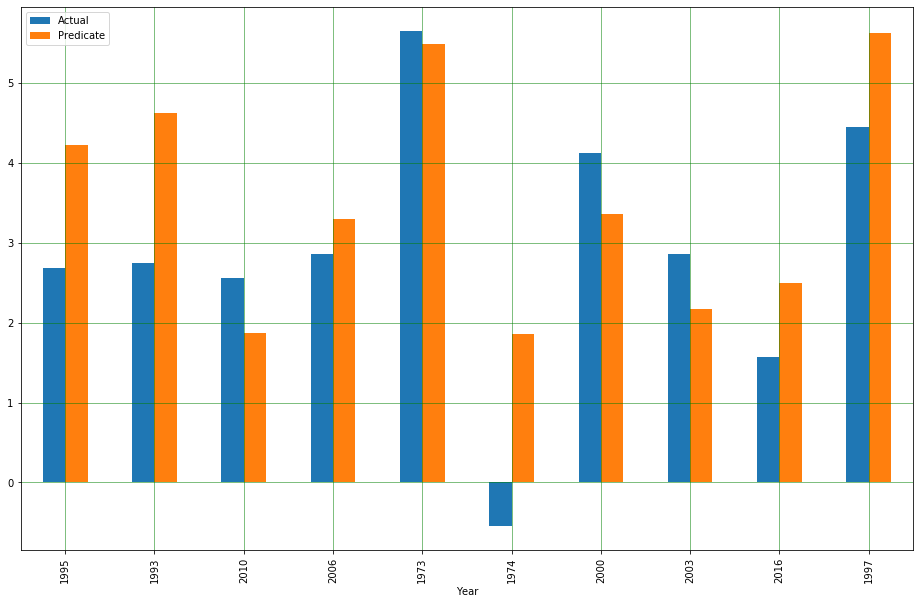

In [66]:

df_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model. I print everything out using a loop to make it more efficient.

In [67]:
#grab the intercept and coefficient
intercept =regression_model.intercept_[0]
coef=regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for cf in zip(X.columns,coef):
    print('The coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept for our model is 2.786
----------------------------------------------------------------------------------------------------
The coefficient for const is 0.0
The coefficient for Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports) is -0.23
The coefficient for Merchandise exports to economies in the Arab World (% of total merchandise exports) is -0.35
The coefficient for Population ages 50-54, female (% of female population) is 0.58
The coefficient for Secondary income receipts (BoP, current US$) is -0.16
The coefficient for Foreign direct investment, net inflows (% of GDP) is 0.16
The coefficient for Real interest rate (%) is -0.18
The coefficient for Ratio of female to male labor force participation rate (%) (national estimate) is -0.089
The coefficient for Employment to population ratio, 15+, female (%) (national estimate) is 1.1
The coefficient for General government final consumption expenditure (% of GDP) is -0

If all independent variables are zero, the GDP growth will be 2.786%, which is reasonable according to Macroeconomics.For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.

If we looked at the Real Interest rate(%)  while holding all other independent variables constant, then we would say for 1 unit increase in Real interest rate (%) would lead to 0.26% decrease in GDP growth.

<br>

<br>

<br>

# 5. Evaluating the Model

To make diagnosing the model easier, we will, from this point forward, be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the OLS() method and then the fit() method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

1.Regression residuals must be normally distributed.

2.The residuals are homoscedastic

3.Absence of multicollinearity (we did this above).

4.No Autocorrelation.

In [68]:
#define our input
X2=sm.add_constant(X)

#creaste an OLS model
model=sm.OLS(Y,X2)

#fit the data
estimate=model.fit()

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
X2

,const,Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to economies in the Arab World (% of total merchandise exports),"Population ages 50-54, female (% of female population)","Secondary income receipts (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",Real interest rate (%),Ratio of female to male labor force participation rate (%) (national estimate),"Employment to population ratio, 15+, female (%) (national estimate)",General government final consumption expenditure (% of GDP),Arms exports (SIPRI trend indicator values)
Year,,,,,,,,,,,
1971,1.0,0.279446,0.241008,0.026390,2.000000e+07,-0.042707,-1.657706,0.538526,-0.399998,-0.023053,2.703000e+09
1972,1.0,-0.602473,0.227321,0.039128,2.100000e+08,0.030854,0.264602,0.772792,0.599998,-0.309501,-9.330000e+08
1973,1.0,-0.117397,0.124090,0.036367,9.000000e+07,0.043191,1.522515,1.085836,1.000000,-0.853014,1.246000e+09
1974,1.0,0.222965,0.950375,0.015416,2.000000e+07,0.066767,-0.758663,1.342731,0.599998,0.386398,7.190000e+08
1975,1.0,0.369825,1.577790,-0.014099,0.000000e+00,-0.063563,-2.932497,1.366553,-0.599998,0.448123,2.954000e+09
1976,1.0,-0.058708,1.158497,-0.036438,4.000000e+07,0.021543,2.548319,1.597086,1.200001,-0.822817,-4.400000e+07
1977,1.0,-0.169759,0.571439,-0.057282,-6.000000e+07,-0.034179,-0.691817,1.258610,1.299999,-0.400009,-1.273000e+09
1978,1.0,-0.258080,-0.251053,-0.077568,1.100000e+08,0.109466,1.314826,1.893984,1.900002,-0.621250,-3.060000e+08
1979,1.0,-0.455629,-0.558002,-0.094852,3.300000e+08,0.082367,2.144612,1.239313,1.099998,-0.363081,-4.358000e+09


In [70]:
estimate

### 5.1 Checking for Heteroscedasticity

Before we use OLS to do regress analysis, we have to do a few assumptions. First is heteroscedasticity. We have to assume that our dataset don't have heteroscedasticity otherwise our OLS analysis is meaningless. To give a simple definition it merely means the standard errors of a variable, monitored over a specific amount of time, are non-constant

To make this concept more easy to remember, i copy a example here

 Let's imagine a situation where heteroscedasticity could exist. Imagine we modeled household consumption based on income, something we would probably notice is how the variability of expenditures changes depending on how much income you have. In simple terms, we would see that households with more income spend money on a broader set of items compared to lower income households that would only be able to focus on the main staples. This results in standard errors that change over income levels.

##### What is the problem with heteroscedasticity?

There are two big reasons why we should want homoscedasticity, not heteroscedasticity:

1.While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

2.Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

##### The method i use to test heteroscedasitcity

To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:

H0 = σ2i = σ2

The alternate hypothesis (the one you’re testing), is that the variances are not equal:

H1 = σ2i ≠ σ2

Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.

In [71]:
#running the white test
_,pval,_,f_pval=diag.het_white(estimate.resid,estimate.model.exog,retres=False)

In [72]:
#print te result of white test
if pval>0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")


#print('P-value=',pval,'F-pvalue=',f_pval)
#print('-'*100)

For the White's Test
The p-value was 1.0
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 



In [73]:
_, pval, _, f_pval = diag.het_breuschpagan(estimate.resid,estimate.model.exog)
#print(pval,f_pval)
#print('-'*100)

if pval>0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

For the Breusch-Pagan's Test
The p-value was 0.882
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 



<br>

<br>

<br>

### 5.2 Checking for Autocorrelation

Autocorrelation is a characteristic of data in which the correlation between the values of the same variables is based on related objects. It violates the assumption of instance independence, which underlies most of conventional models.

When you have a series of numbers, and there is a pattern such that values in the series can be predicted based on preceding values in the series, the set of numbers is said to exhibit autocorrelation. This is also known as serial correlation and serial dependence. It generally exists in those types of data-sets in which the data, instead of being randomly selected, are from the same source.

The existence of autocorrelation means that computed standard errors, and consequently p-values, are misleading. Autocorrelation in the residuals of a model is also a sign that the model may be unsound. A workaround is we can compute more robust standard errors.

##### Test for Autocorreletion

Again, we will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

- H0: The data are random.
- Ha: The data are not random.

That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the acorr_ljungbox function, pass through the est.resid and then define the lags.

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be min((num_obs // 2 - 2), 40), however, there is a rule of thumb that for non-seasonal time series the lag is min(10, (num_obs // 5)).

We also can visually check for autocorrelation by using the statsmodels.graphics module to plot a graph of the autocorrelation factor.

The number of lags will be 9
****************************************************************************************************
The lowest p-value found was 0.004746
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


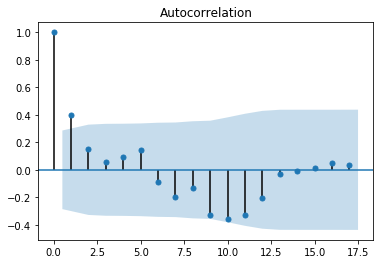

In [74]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

lag=min(10,(len(X)//5))
print("The number of lags will be {}".format(lag))
print("*"*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)

#perform Ljung-Box test
L_B_test_results=diag.acorr_ljungbox(estimate.resid, lags=lag)

#grab the p-value and the test statistics 
ibvalue,p_val=L_B_test_results
# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(estimate.resid)
plt.show()

### 5.3 Checking the Mean of the Residuals Equals 0

Additionally, we need to check another assumption, that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors. However, if it's very close to zero, it's ok. In the example below, you will see that it doesn't come out exactly to zero.

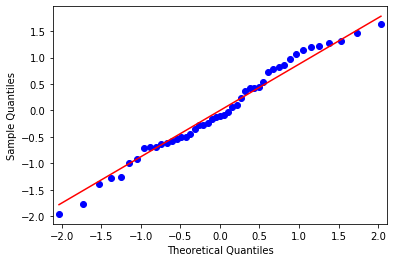

The mean of the residuals is -7.345e-07


In [75]:
# check for the normality of the residuals
sm.qqplot(estimate.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(estimate.resid)/ len(estimate.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

- Mean Absolute Error (MAE): Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- Mean Squared Error (MSE): Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- Root Mean Squared Error (RMSE): Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [76]:
# calculate the mean squared error
model_mse = mean_squared_error(Y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.57
MAE 1.07
RMSE 1.25


In [77]:
model_r2 = r2_score(Y_test, y_predict)
print("R2: {:.2}".format(model_r2))


R2: 0.38


In [78]:
# make some confidence intervals, 95% by default
estimate.conf_int()

,0,1
const,1.707239e+00,2.800232e+00
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),-2.540021e+00,8.284944e-01
Merchandise exports to economies in the Arab World (% of total merchandise exports),-1.248748e+00,-6.685883e-02
"Population ages 50-54, female (% of female population)",1.229173e+00,7.310404e+00
"Secondary income receipts (BoP, current US$)",-4.262667e-11,1.775199e-11
"Foreign direct investment, net inflows (% of GDP)",-3.255778e-01,9.616756e-01
Real interest rate (%),-4.273314e-01,1.664247e-01
Ratio of female to male labor force participation rate (%) (national estimate),-8.880617e-01,7.598359e-01
"Employment to population ratio, 15+, female (%) (national estimate)",2.772565e-01,2.018273e+00
General government final consumption expenditure (% of GDP),-3.255306e+00,-1.080967e+00


In [79]:
# estimate the p-values
estimate.pvalues

const                                                                                                             5.842772e-10
Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)    3.096655e-01
Merchandise exports to economies in the Arab World (% of total merchandise exports)                               3.013512e-02
Population ages 50-54, female (% of female population)                                                            7.227428e-03
Secondary income receipts (BoP, current US$)                                                                      4.089305e-01
Foreign direct investment, net inflows (% of GDP)                                                                 3.229432e-01
Real interest rate (%)                                                                                            3.787506e-01
Ratio of female to male labor force participation rate (%) (national estimate)                                 

In [80]:

# print out a summary
print(estimate.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.804
Model:                               OLS   Adj. R-squared:                  0.749
Method:                    Least Squares   F-statistic:                     14.75
Date:                   Tue, 10 Dec 2019   Prob (F-statistic):           5.95e-10
Time:                           02:04:51   Log-Likelihood:                -60.378
No. Observations:                     47   AIC:                             142.8
Df Residuals:                         36   BIC:                             163.1
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-

In [81]:
# define our input variable (X) & output variable
drop_list=["Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)",
           "Foreign direct investment, net inflows (% of GDP)",
           "Ratio of female to male labor force participation rate (%) (national estimate)",
           "Secondary income receipts (BoP, current US$)",
           "Arms exports (SIPRI trend indicator values)",
           "Real interest rate (%)",
           "Arms exports (SIPRI trend indicator values)"
          ]
econ_df_after = df_13.drop(drop_list, axis = 1)

X = econ_df_after.drop('GDP growth (annual %)', axis = 1)
Y = econ_df_after[['GDP growth (annual %)']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# standardization before fitting data so that they have 0-mean and unit-variance: z = (x - u) / s
scaler = preprocessing.StandardScaler().fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)


#fit the model
regression_model.fit(x_train_s,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.780
Model:                               OLS   Adj. R-squared:                  0.759
Method:                    Least Squares   F-statistic:                     37.27
Date:                   Tue, 10 Dec 2019   Prob (F-statistic):           2.64e-13
Time:                           02:04:54   Log-Likelihood:                -63.049
No. Observations:                     47   AIC:                             136.1
Df Residuals:                         42   BIC:                             145.3
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
